# Кластеризация и распознавание 

In [1]:
import face_recognition 
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image, ImageDraw
import numpy as np
import os

In [2]:
path_name = "Cluster"
photos = list(map(lambda i: path_name + "\\" + i, os.listdir(path_name)))

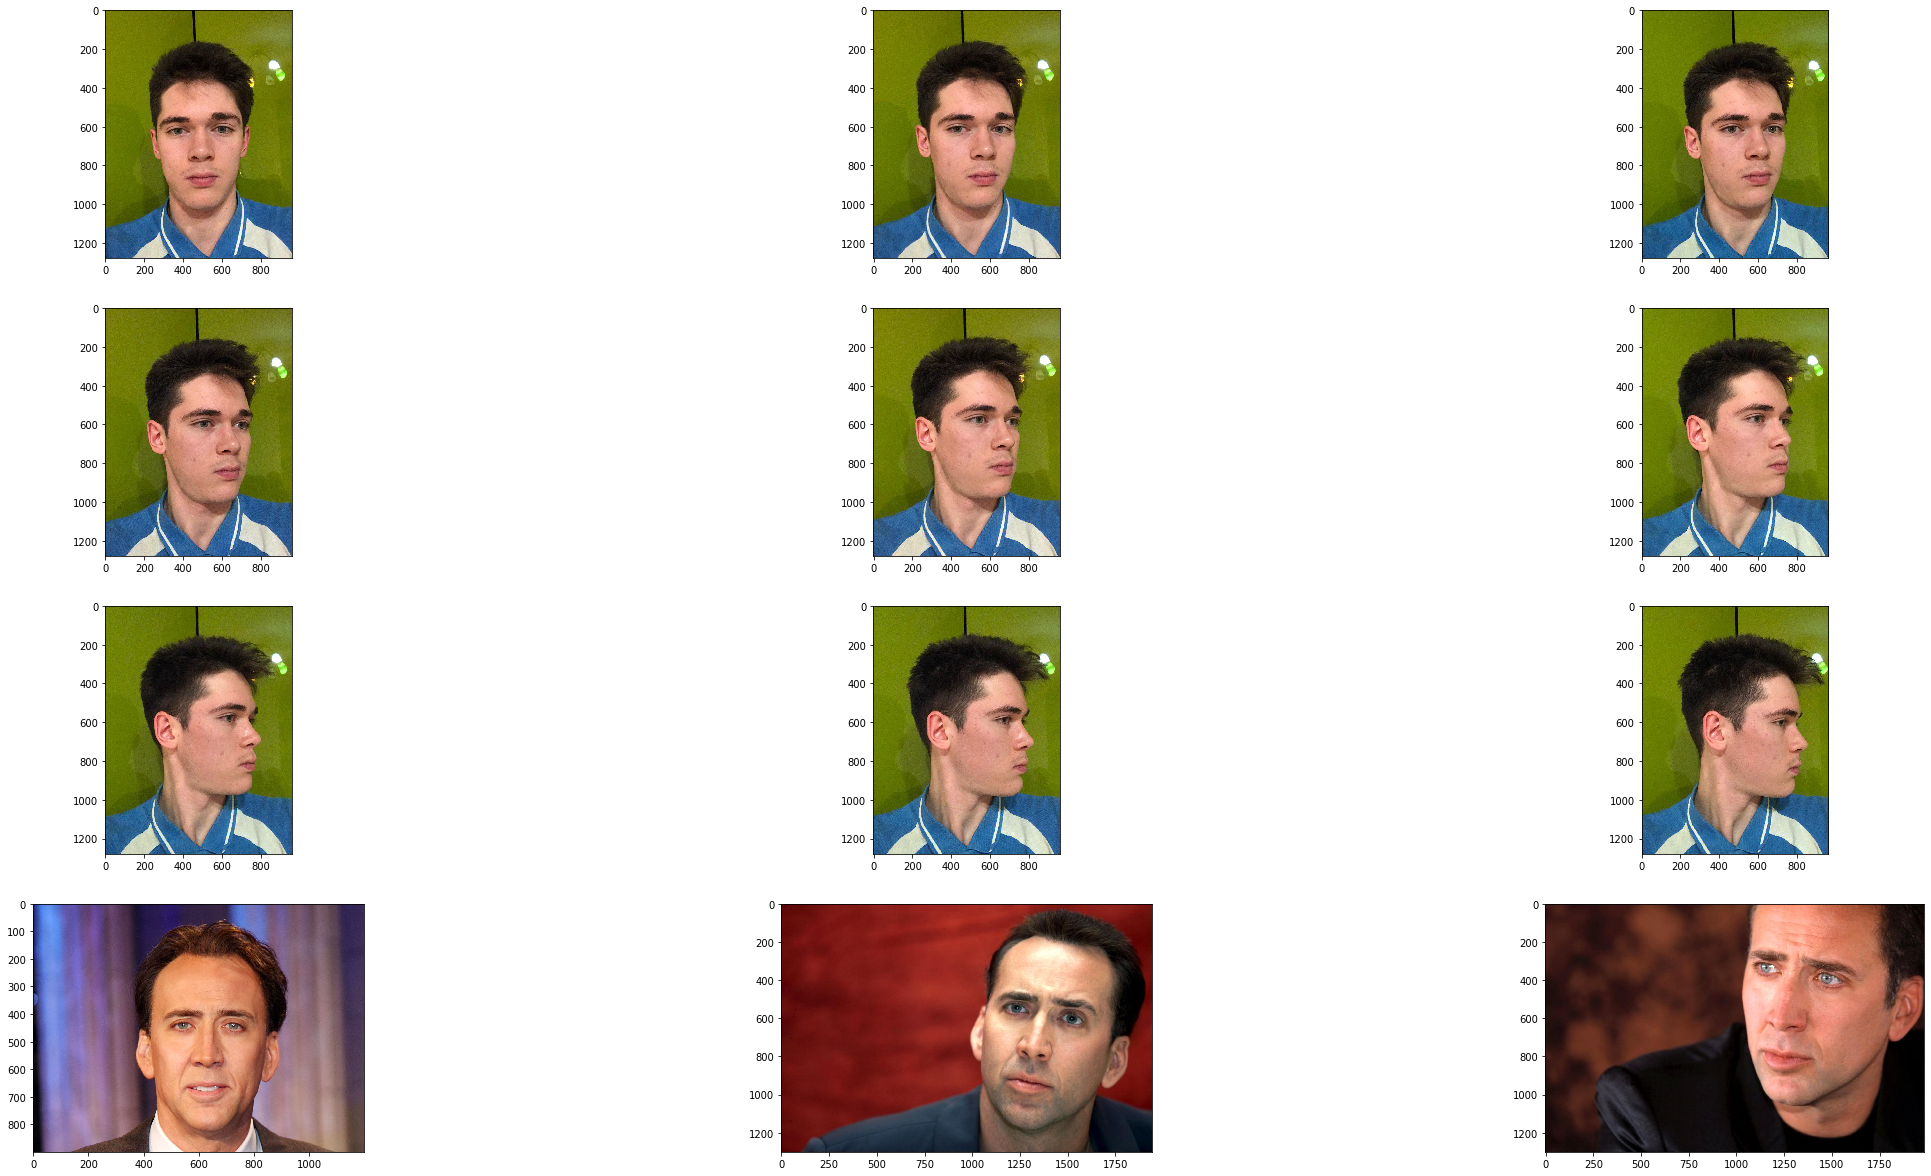

In [4]:
fig = plt.figure()
fig.set_size_inches(39, 21)
i = 1
for photo_name in photos:
    photo = Image.open(photo_name)

    a = fig.add_subplot(4, 3, i)
    imgplot = plt.imshow(photo)
    i += 1

plt.show()

## Детект

In [5]:
def face_detection(model="hog"):
    
    fig = plt.figure()
    fig.set_size_inches(39, 21)
    faces = []
    i = 1
    for photo_name in photos:
        
        ax = fig.add_subplot(4, 3, i)
        ax.set_title(model, fontsize=30)
        photo = Image.open(photo_name)
        ax.imshow(np.array(photo, dtype=np.uint8))

        face_locations = face_recognition.face_locations(
            face_recognition.load_image_file(photo_name), model=model)
        faces.append(face_locations)
        if len(face_locations) != 0:
            x = face_locations[0][3]
            y = face_locations[0][0]
            max_x = face_locations[0][1]
            max_y = face_locations[0][2]
            rect = patches.Rectangle(
                (x, y), max_x - x, max_y - y, linewidth=1, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
        i += 1

    return faces

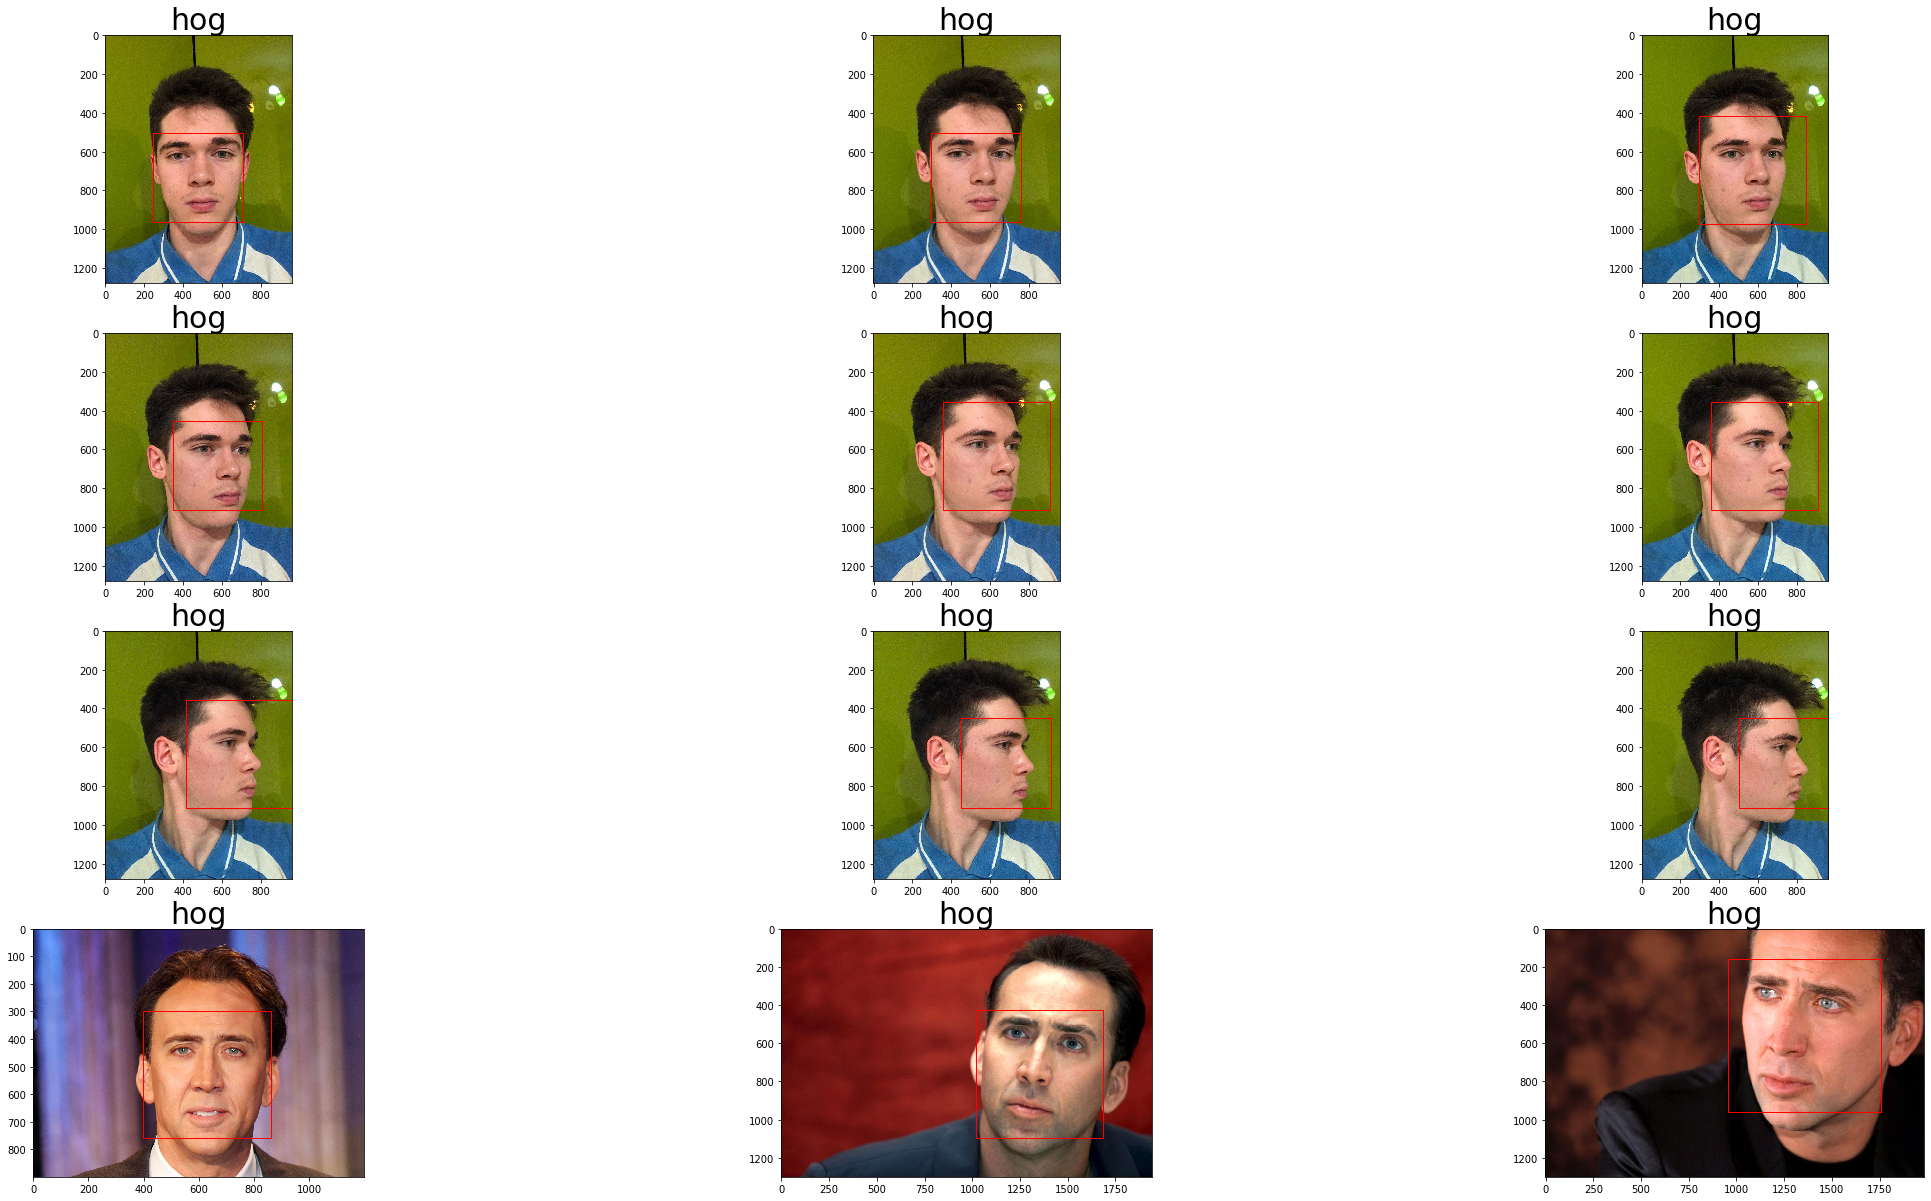

In [6]:
faces = face_detection()

In [7]:
faces

[[(502, 707, 965, 245)],
 [(502, 759, 965, 297)],
 [(418, 849, 973, 295)],
 [(451, 810, 913, 348)],
 [(357, 911, 911, 356)],
 [(357, 911, 911, 356)],
 [(357, 961, 911, 418)],
 [(451, 913, 913, 451)],
 [(451, 961, 913, 502)],
 [(297, 861, 759, 399)],
 [(428, 1685, 1094, 1019)],
 [(159, 1756, 958, 958)]]

## Проблема

[False]


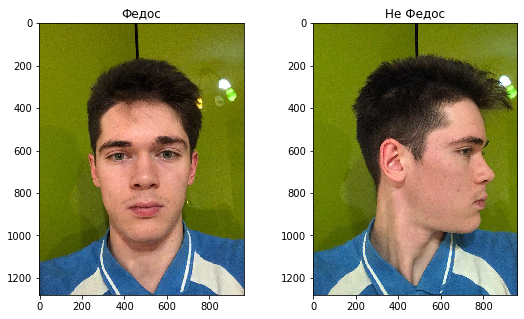

In [8]:
first = face_recognition.face_encodings(face_recognition.load_image_file(photos[0]), faces[0])[0]
last = face_recognition.face_encodings(face_recognition.load_image_file(photos[8]), faces[8])[0]
print(face_recognition.compare_faces([first], last, tolerance=0.6))

fig = plt.figure()
fig.set_size_inches(9, 5)

a = fig.add_subplot(1, 2, 1)
a.set_title("Федос")
imgplot = plt.imshow(Image.open(photos[0]))

a = fig.add_subplot(1, 2, 2)
a.set_title("Не Федос")
imgplot = plt.imshow(Image.open(photos[8]))

plt.show()

## Решение

In [9]:
def make_cluster(photos, faces):
    encod_faces = {}
    i = 0
    for photo_name in photos:
        image = face_recognition.load_image_file(photo_name)
        encod = face_recognition.face_encodings(image, faces[i])[0]
        encod_faces.update({photo_name: encod})
        i += 1

    encods_clusters = [[], []]
    encods_clusters[0].append(list(encod_faces.values())[0])

    for encod in list(encod_faces.values())[1:]:
        i = 0
        new_face = True
        for cluster in encods_clusters:
            if True in face_recognition.compare_faces(cluster, encod, tolerance=0.6):
                encods_clusters[i].append(encod)
                new_face = False
            i += 1
        if new_face:
            encods_clusters.append([encod])
    
    clusters = [x for x in encods_clusters if x != []]

    # Делаем список кластеров по именам изображений, 
    # сопоставляя значение в словаре (encod_faces.values())
    # со значениями в кластерах
    i1 = 0
    for i in clusters:
        j1 = 0
        for j in i:
            z = 0
            for encod in list(encod_faces.values()):
                if all(elem1 in encod for elem1 in j):
                    clusters[i1][j1] = list(encod_faces.keys())[z]
                z += 1
            j1 += 1
        i1 += 1

    return clusters

In [10]:
clusters = make_cluster(photos, faces)

In [11]:
clusters

[['Cluster\\1.jpg',
  'Cluster\\2.jpg',
  'Cluster\\3.jpg',
  'Cluster\\4.jpg',
  'Cluster\\5.jpg',
  'Cluster\\6.jpg',
  'Cluster\\7.jpg',
  'Cluster\\8.jpg',
  'Cluster\\9.jpg'],
 ['Cluster\\cag2.jpg', 'Cluster\\cage3.jpg', 'Cluster\\cage4.jpg']]

In [12]:
def show_clusters(clusters):
    fig = plt.figure()
    fig.set_size_inches(39, 21)
    i = 1
    num_cluster = 0
    for cluster in clusters:
        for photo_name in cluster:
            photo = Image.open(photo_name)
            ax = fig.add_subplot(4, 3, i)
            ax.set_title("cluster" + str(num_cluster),  fontsize=30)
            imgplot = plt.imshow(photo)
            i += 1
        num_cluster += 1

    plt.show()

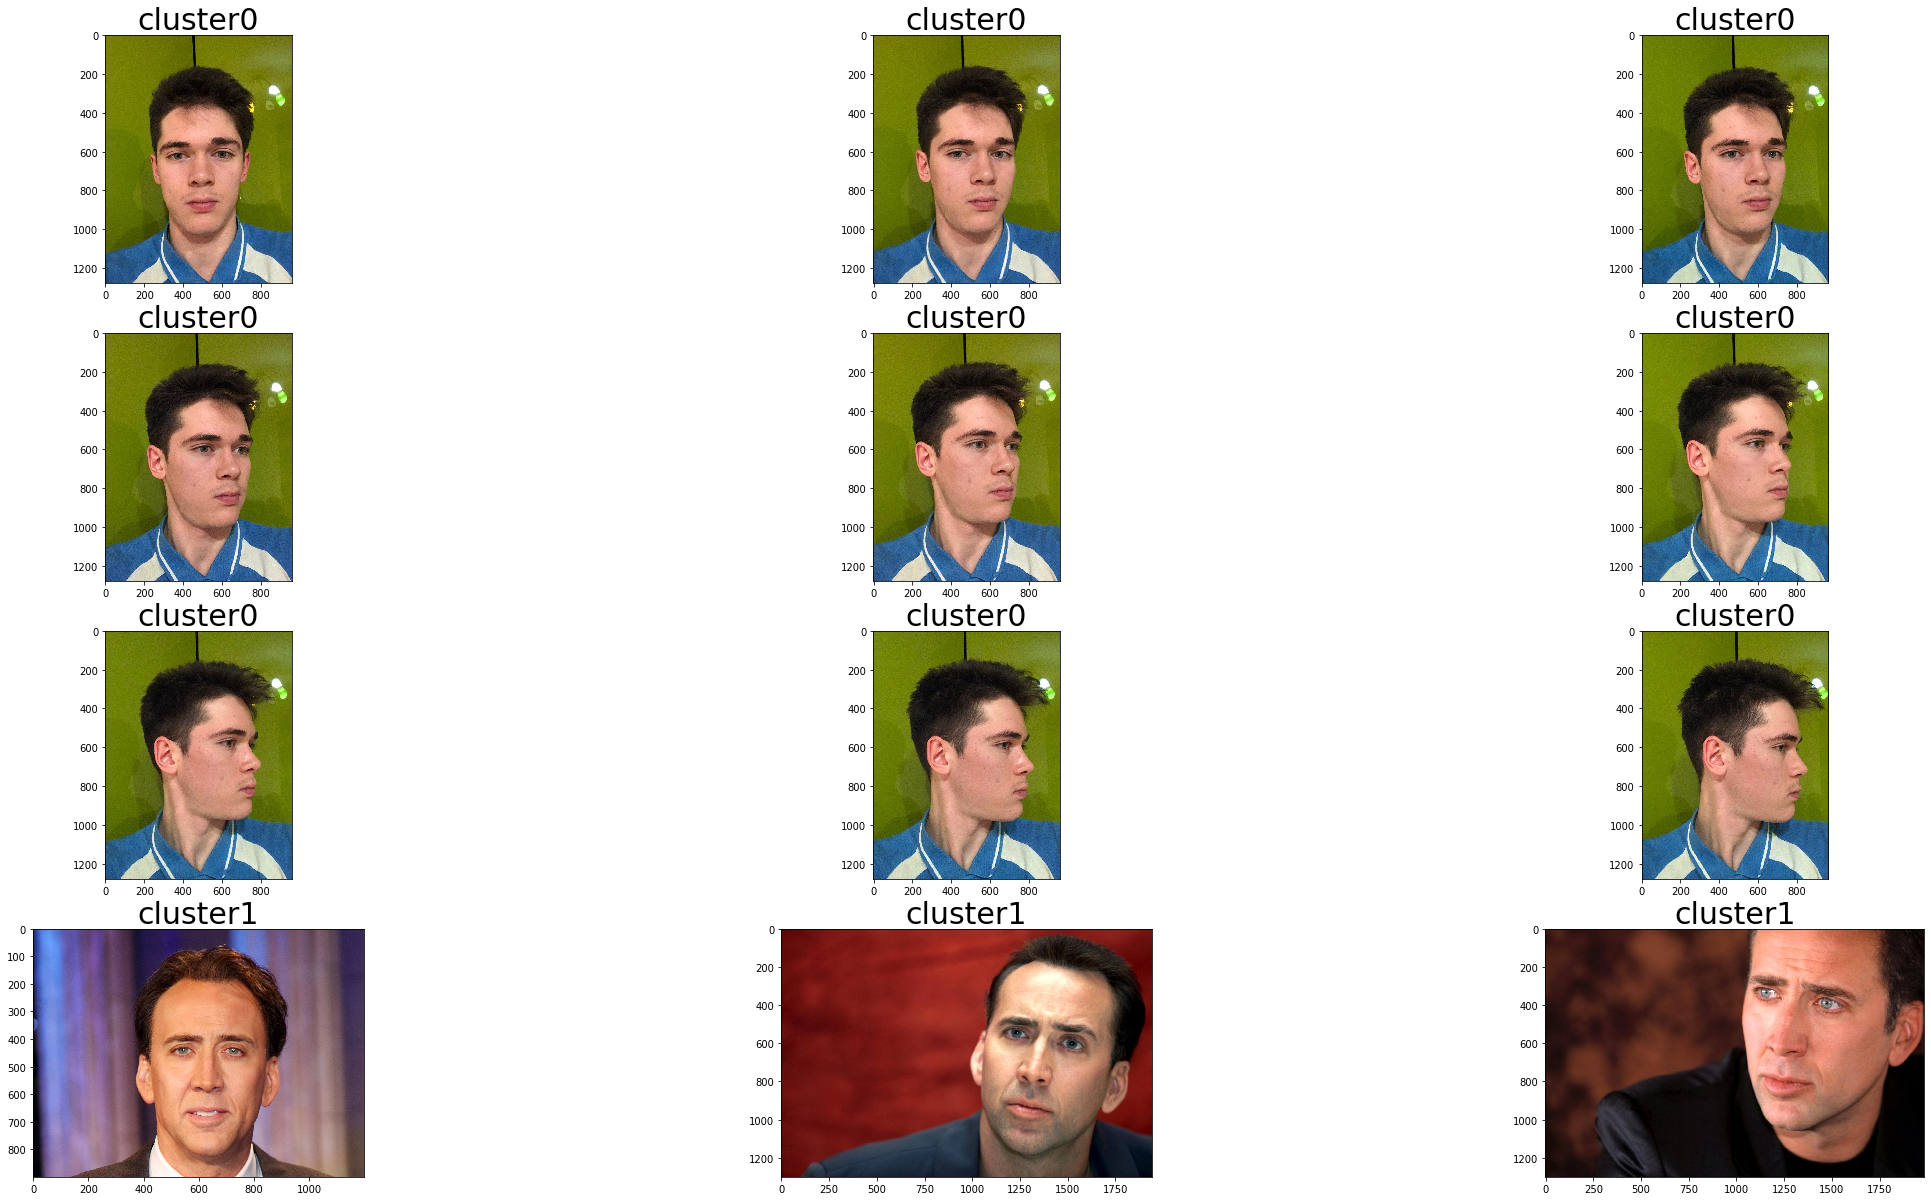

In [13]:
show_clusters(clusters)

## Что-то с лицом

In [14]:
new_photo = "Images\\glasses.jpg"

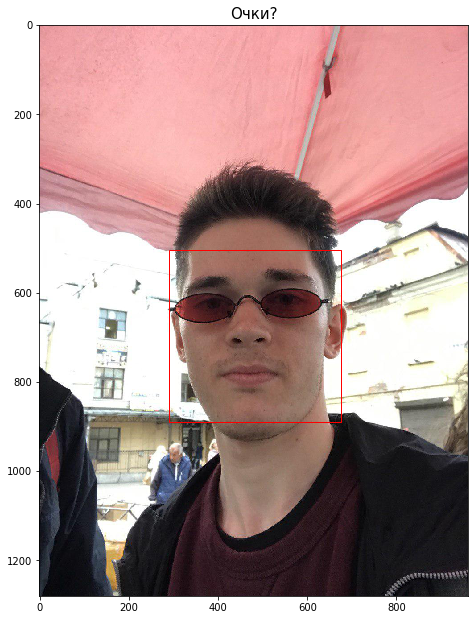

In [16]:
fig = plt.figure()
fig.set_size_inches(19.5, 10.5)
ax = fig.add_subplot(1, 1, 1)
ax.set_title("Очки?", fontsize=15)
photo = Image.open(new_photo)
ax.imshow(np.array(photo, dtype=np.uint8))

new_face_locations = face_recognition.face_locations(
    face_recognition.load_image_file(new_photo))

if len(new_face_locations) != 0:
    x = new_face_locations[0][3]
    y = new_face_locations[0][0]
    max_x = new_face_locations[0][1]
    max_y = new_face_locations[0][2]
    rect = patches.Rectangle(
        (x, y), max_x - x, max_y - y, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

plt.show()

In [17]:
photos.pop()
faces.pop()
photos.append(new_photo)
faces.append(new_face_locations)

In [18]:
clusters = make_cluster(photos, faces)

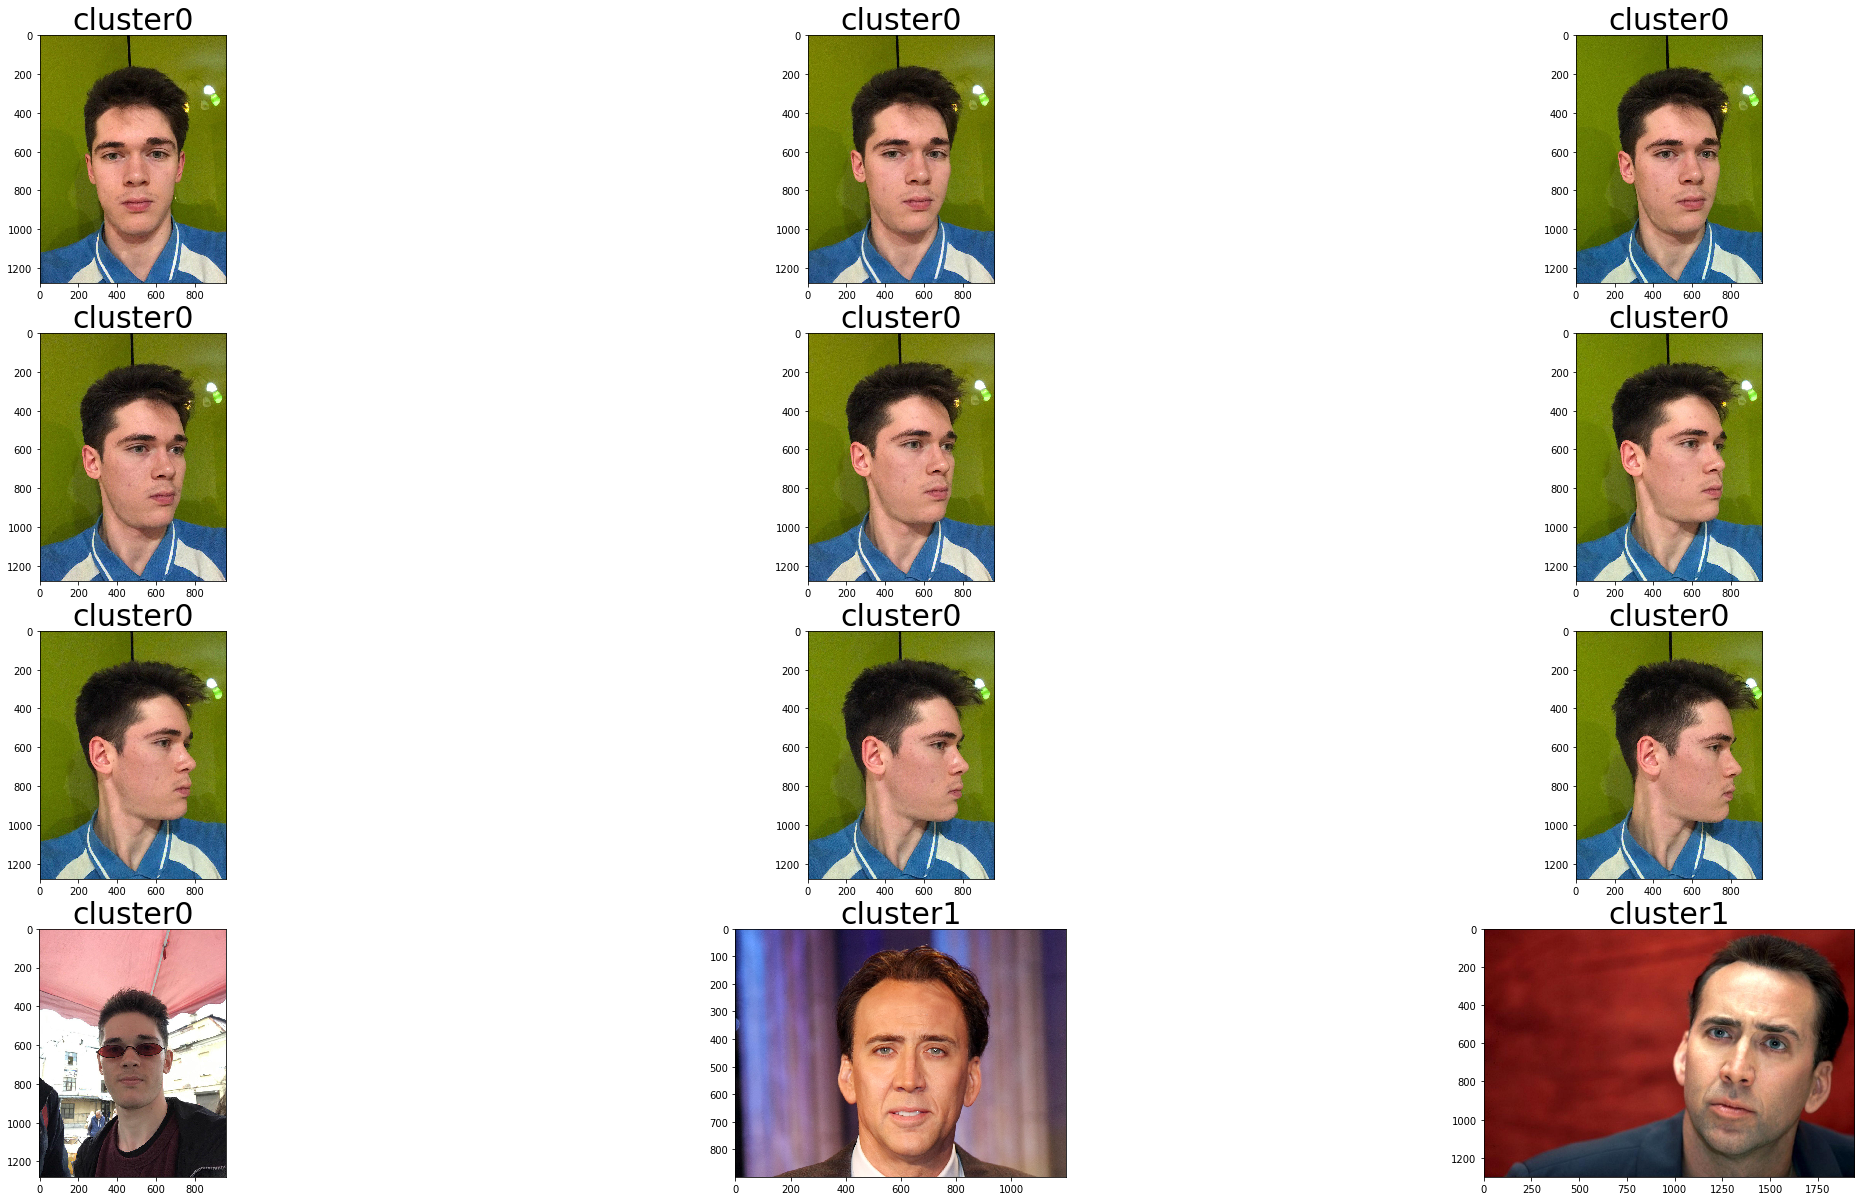

In [19]:
show_clusters(clusters)